In [2]:
# import new_model_integration as model_mobster_mv
import model_mobster as model_mobster_mv
import numpy as np
import pandas as pd
import pyro.distributions as dist
import scipy.stats as stats
import torch
import pyro
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

from utils.plot_functions import *
from utils.BoundedPareto import BoundedPareto
from utils.create_beta_pareto_dataset import *

%load_ext autoreload
%autoreload 2

/Users/elenarivaroli/miniconda3/envs/mobster/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


To see if starting from a wrong configuration will lead to a good one:
- Start from a very wrong configurations of $\delta$, and not using delta_.
- Use GMM to initialize.
- Use gaussian noise.

### Hitchhikers

In [3]:
NV = pd.read_csv("./data/hitchhikers/NV_bigger.csv")
DP = pd.read_csv("./data/hitchhikers/DP_bigger.csv")
NV = torch.tensor(NV.values)
DP = torch.tensor(DP.values)

No GPU available.
RUN WITH K = 7 AND SEED = 42
Minimum detected VAF: tensor(0.0200)


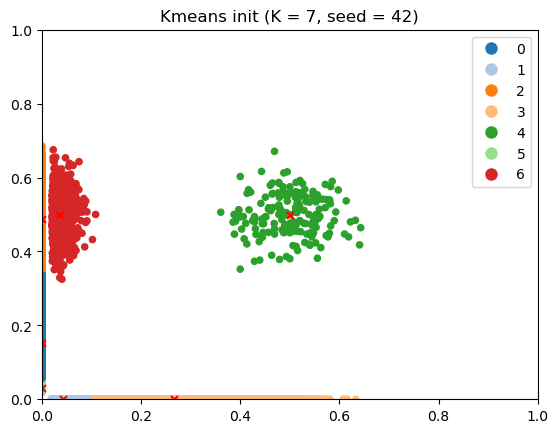

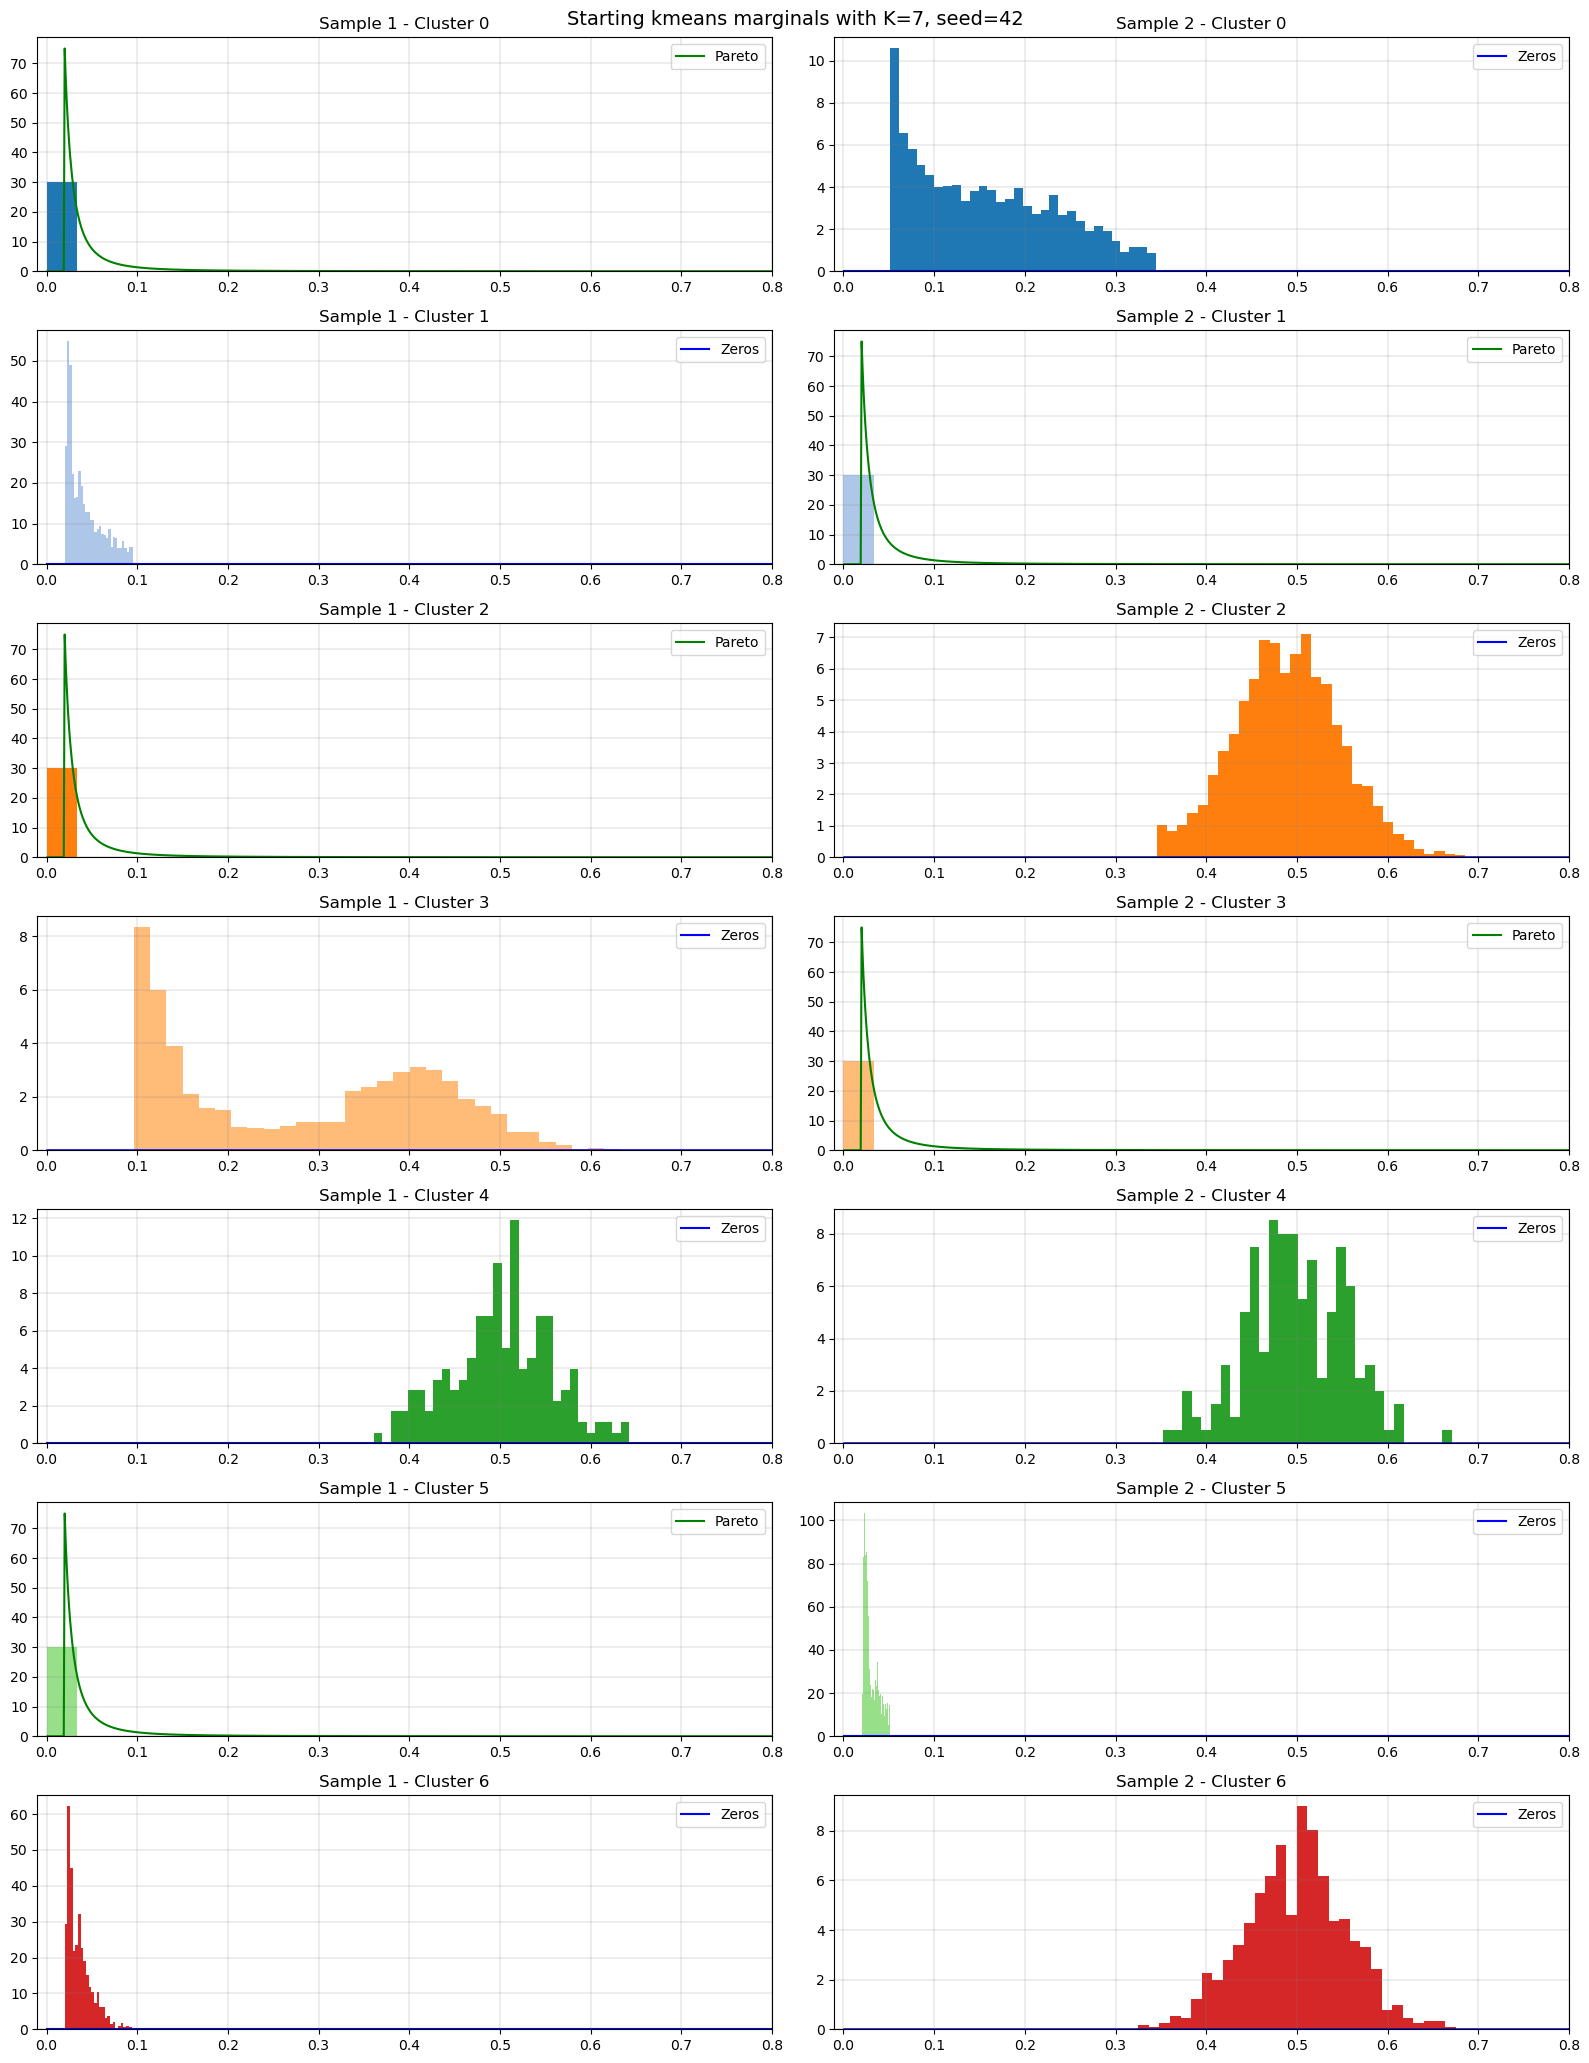

Iteration 0: Loss = 2391073518.6847553
Iteration 50: Loss = 1970113964.4626112
Iteration 100: Loss = 1774184817.0433764
Iteration 150: Loss = 1691003917.491809
Iteration 200: Loss = 1653232955.3066187
Iteration 250: Loss = 1634450413.2140527
Iteration 300: Loss = 1623680084.6192675
Iteration 350: Loss = 1616899869.376336
Iteration 400: Loss = 1612383850.382085
Iteration 450: Loss = 1609264707.133195
Iteration 500: Loss = 1607044440.4421237
Iteration 550: Loss = 1605417118.546898
Iteration 600: Loss = 1604186794.8802547


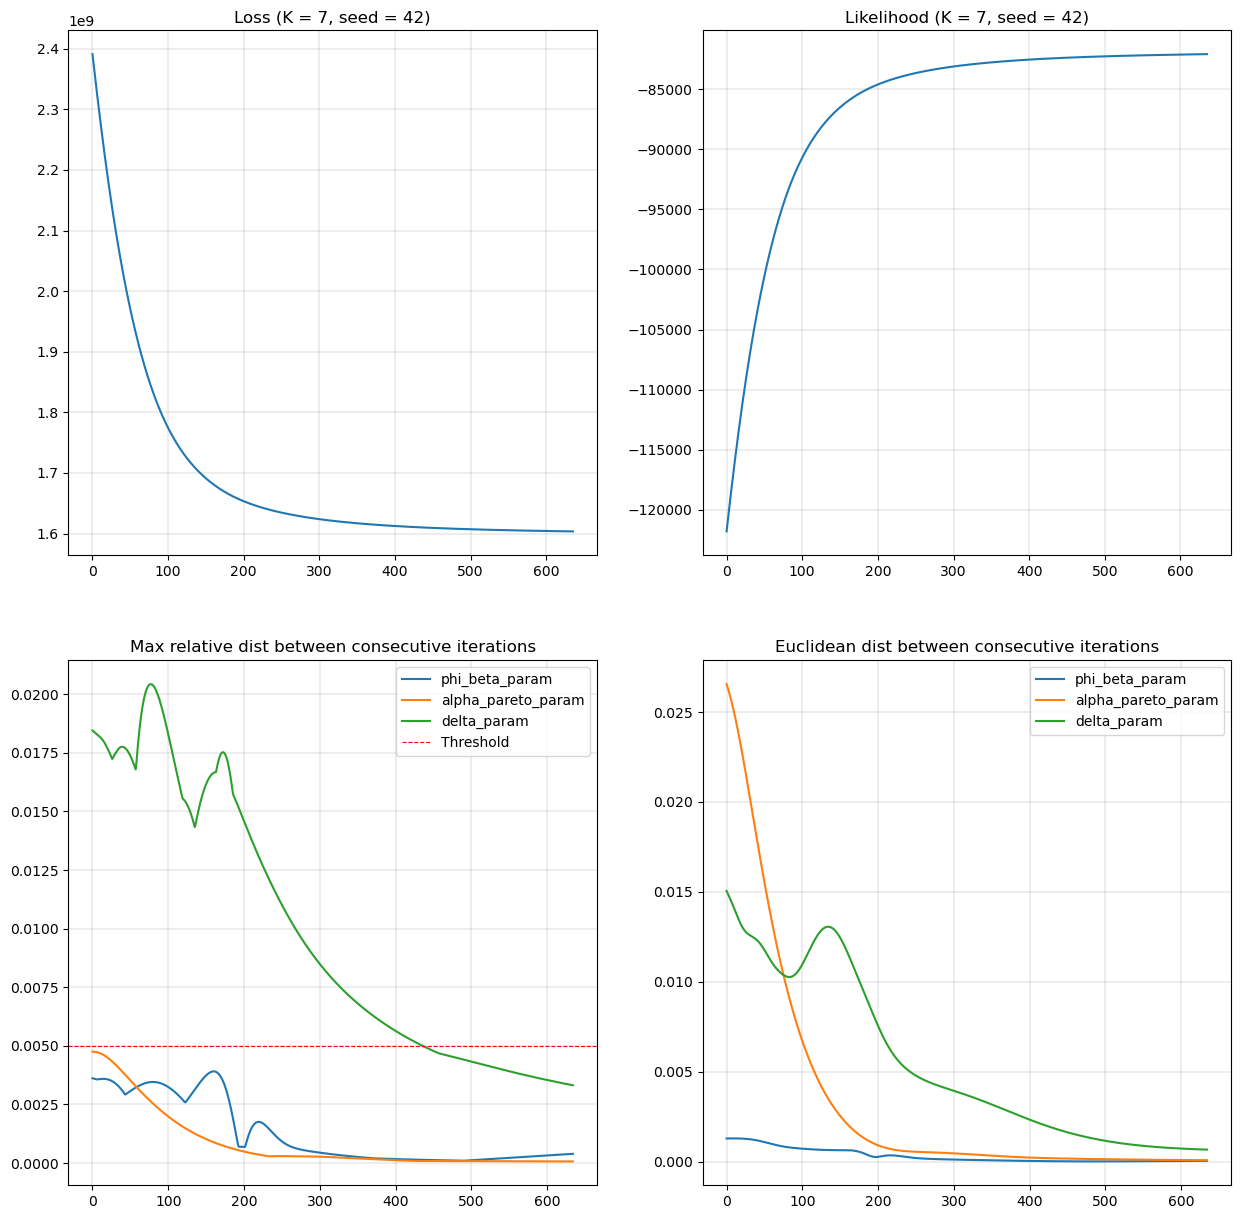

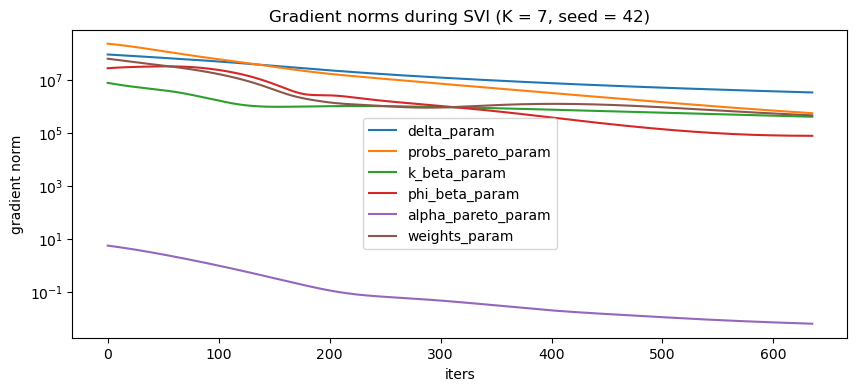

Inference lk:  -82064.86647144999
Final lk (integr):  tensor(-84572.0938, grad_fn=<SumBackward0>)
n_params:  105
n:  tensor(19537)
lk:  tensor(-84572.0938, grad_fn=<SumBackward0>)
bic: 170181.59375 



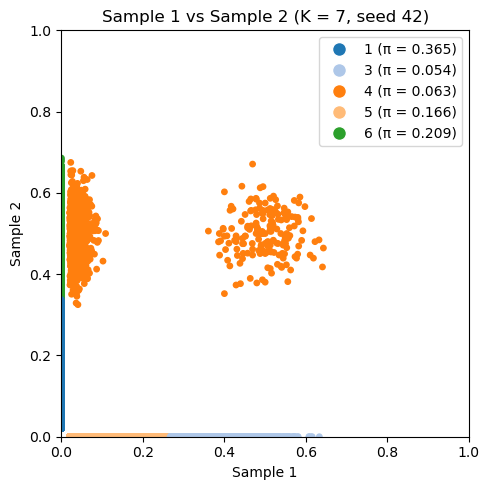

Time taken for K = 7 and seed = 42: 56.070 seconds


/Users/elenarivaroli/miniconda3/envs/mobster/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


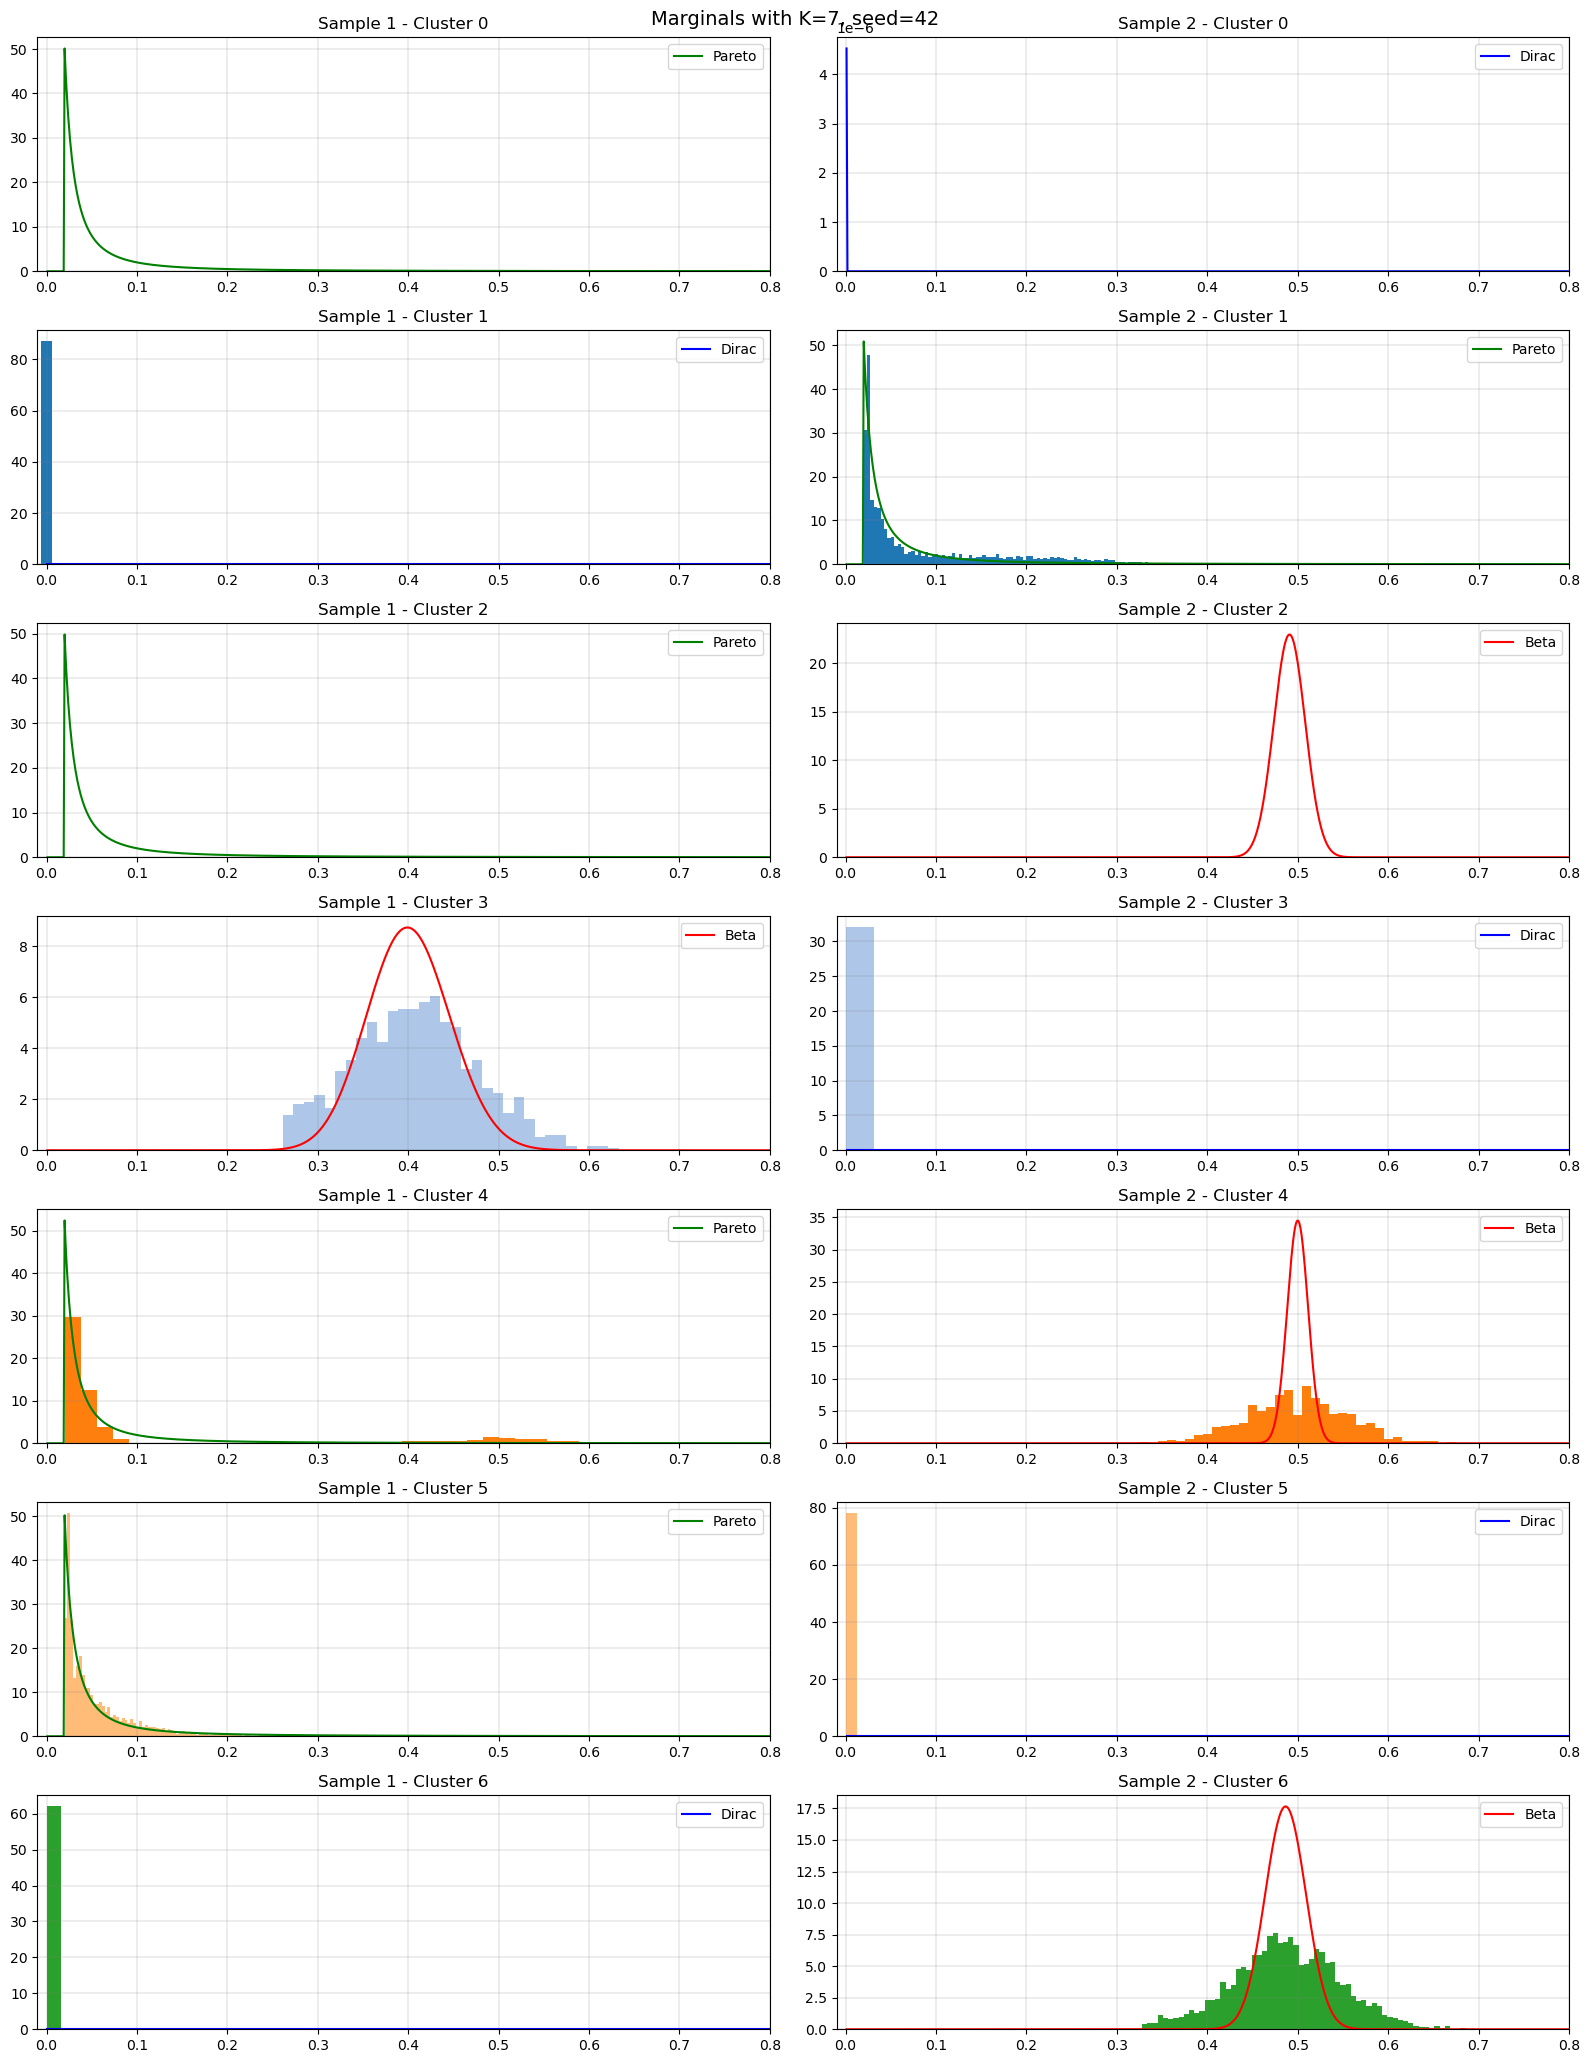

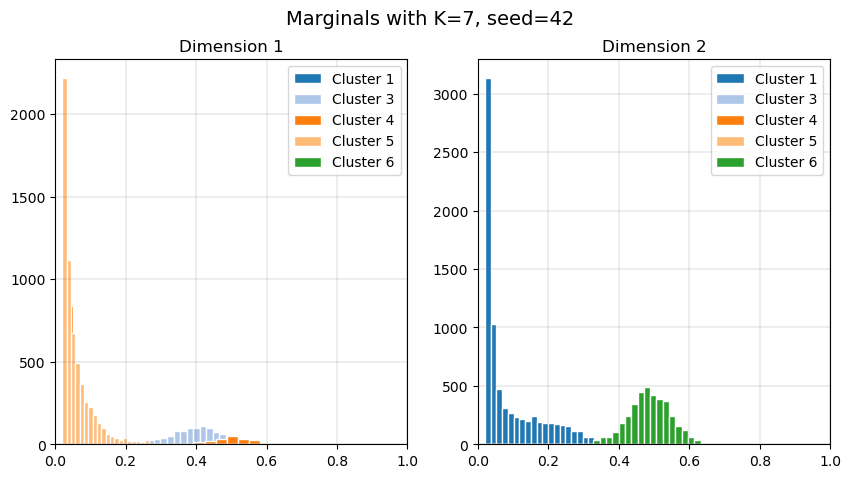

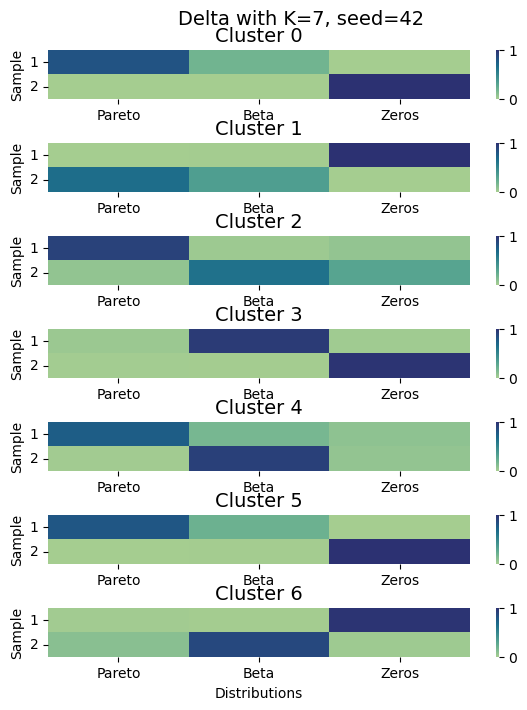

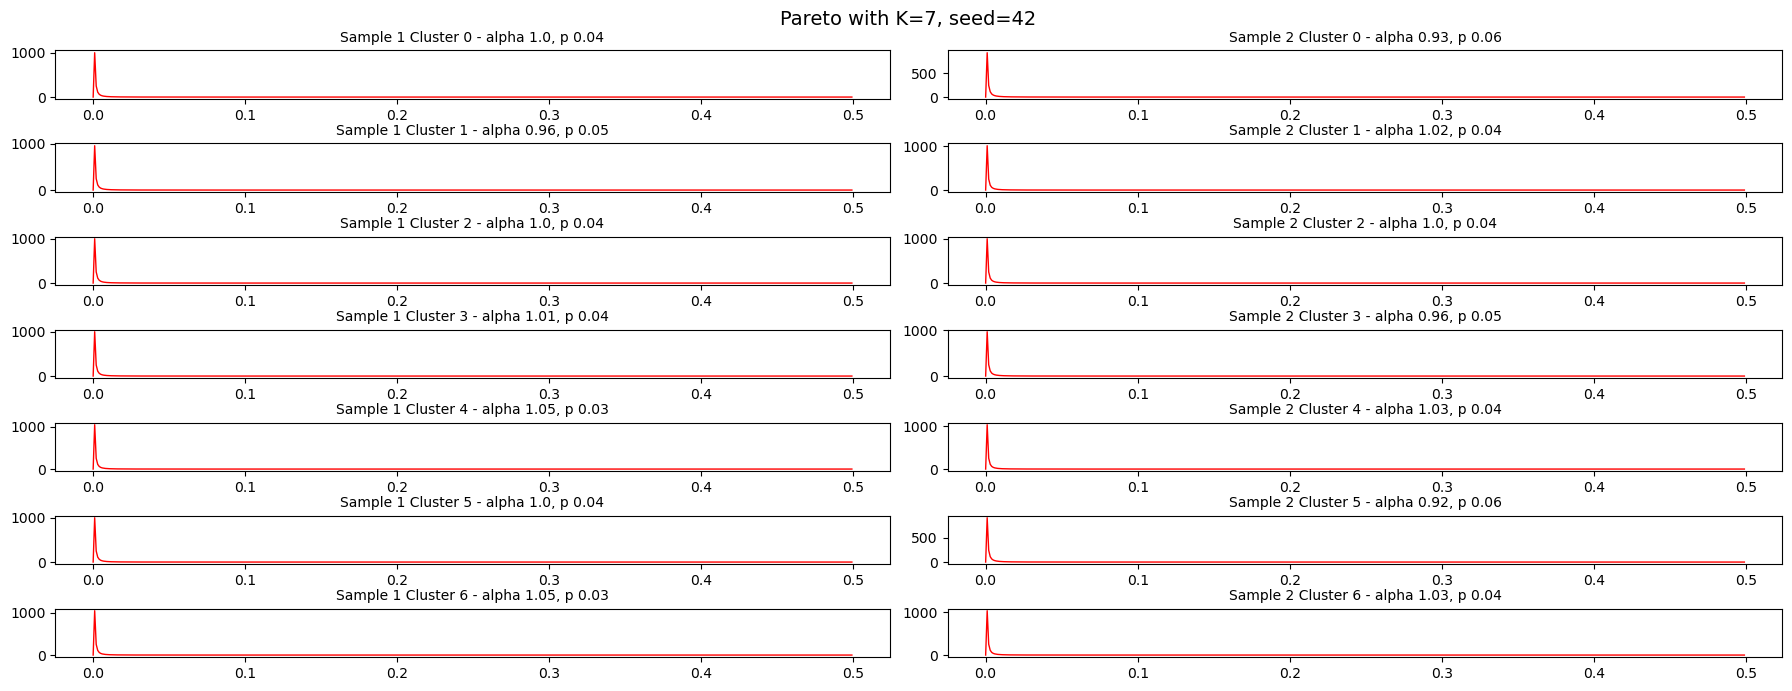

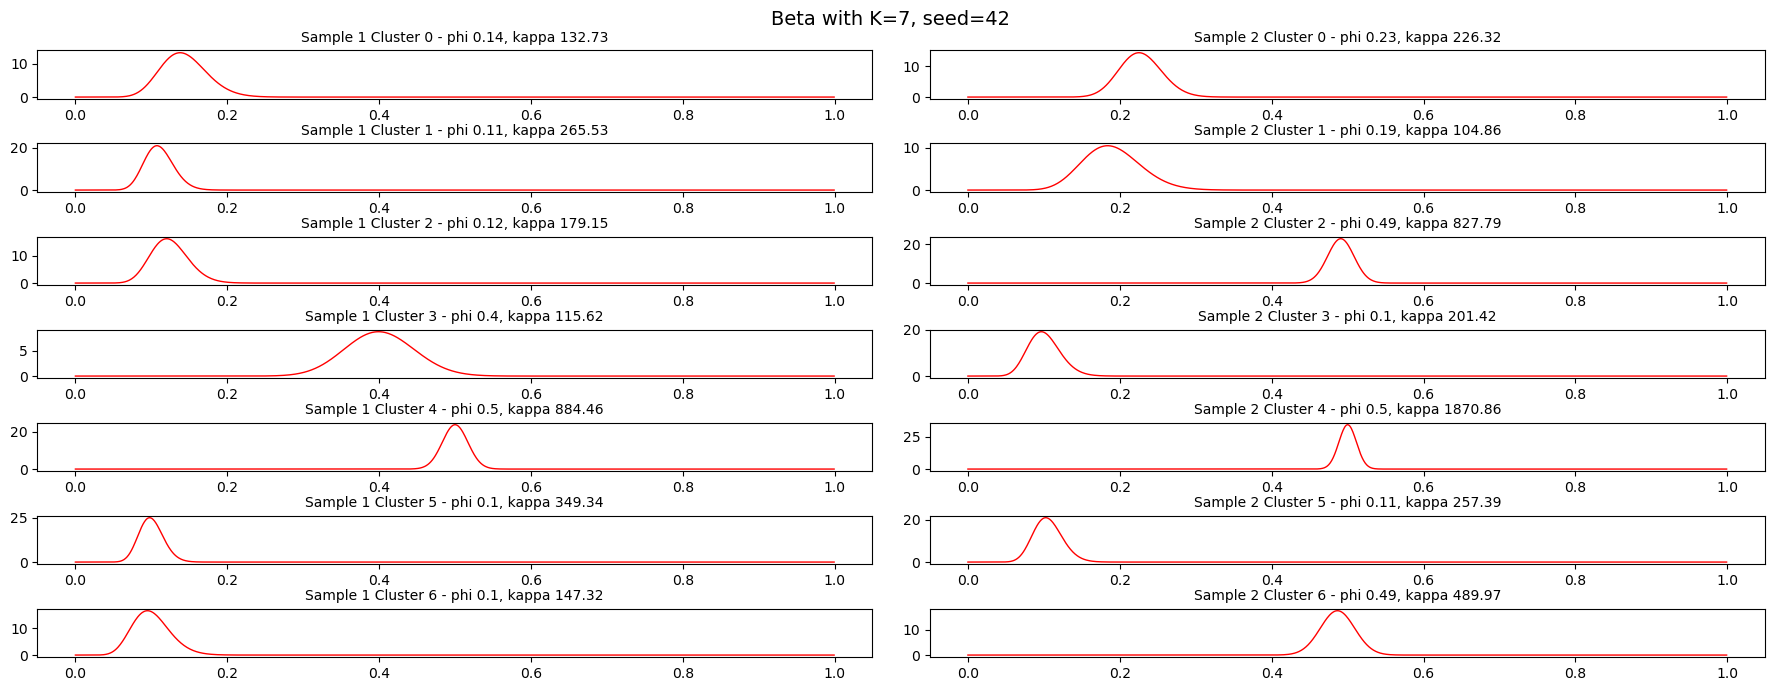

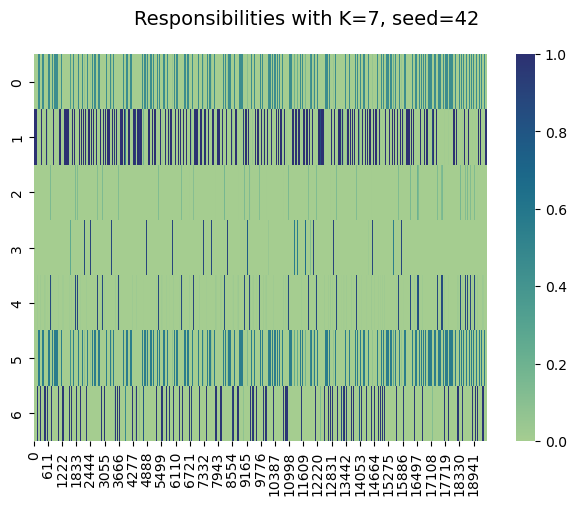

tensor([   0, 7534,    0,  994, 1171, 6056, 3782])


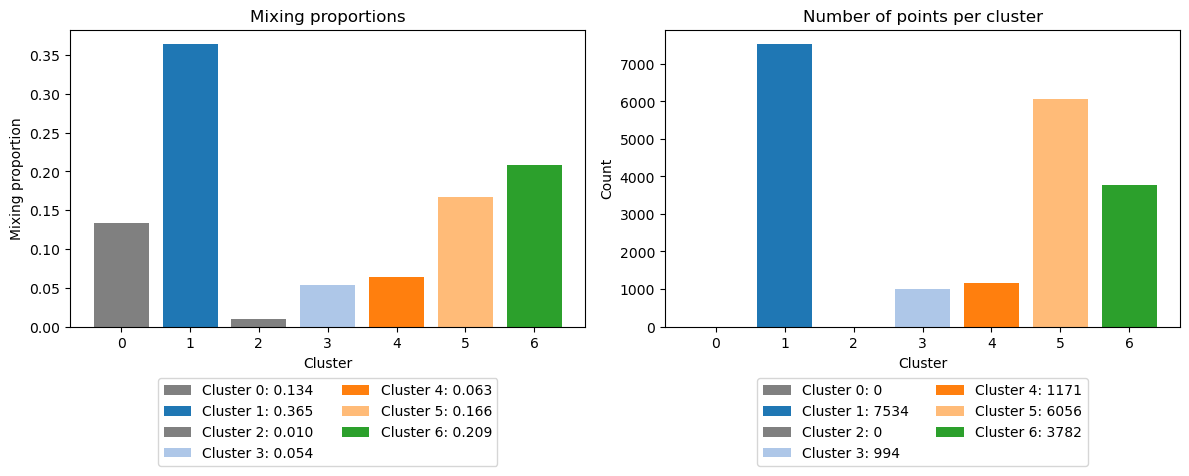

Selected number of clusters is 7 with seed 42


In [4]:
K_list = [7]
seed_list = [42]
mb_list, best_K, best_seed = model_mobster_mv.fit(NV, DP, num_iter = 2000, K = K_list, seed = seed_list, lr = 0.01)#, choice_init_centers = 'kmeans')